In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.00,35.0000,53.000,72.0000,89.00
height,3000.0,168.585687,9.351876,141.13,161.8000,168.115,175.3525,195.28
weight,3000.0,72.486680,13.167222,36.32,63.0350,71.240,81.8325,120.88
cholesterol,3000.0,233.910523,24.333434,148.81,216.9275,234.255,250.3775,313.35
systolic_blood_pressure,3000.0,146.144333,15.845310,97.00,135.0000,146.000,158.0000,191.00
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.00,89.0000,95.000,102.0000,124.00
glucose,3000.0,126.467720,18.536844,70.05,113.9125,126.555,139.1800,185.74
bone_density,3000.0,0.933367,0.444783,-0.22,0.5600,0.940,1.3000,2.00
mean_working,1968.0,8.716972,1.628944,4.00,8.0000,9.000,10.0000,16.00
stress_score,3000.0,0.482130,0.288252,0.00,0.2300,0.480,0.7300,1.00


In [6]:
train.isnull().sum()

ID                             0
gender                         0
age                            0
height                         0
weight                         0
cholesterol                    0
systolic_blood_pressure        0
diastolic_blood_pressure       0
glucose                        0
bone_density                   0
activity                       0
smoke_status                   0
medical_history             1289
family_medical_history      1486
sleep_pattern                  0
edu_level                    607
mean_working                1032
stress_score                   0
dtype: int64

결측치 시각화

<Axes: >

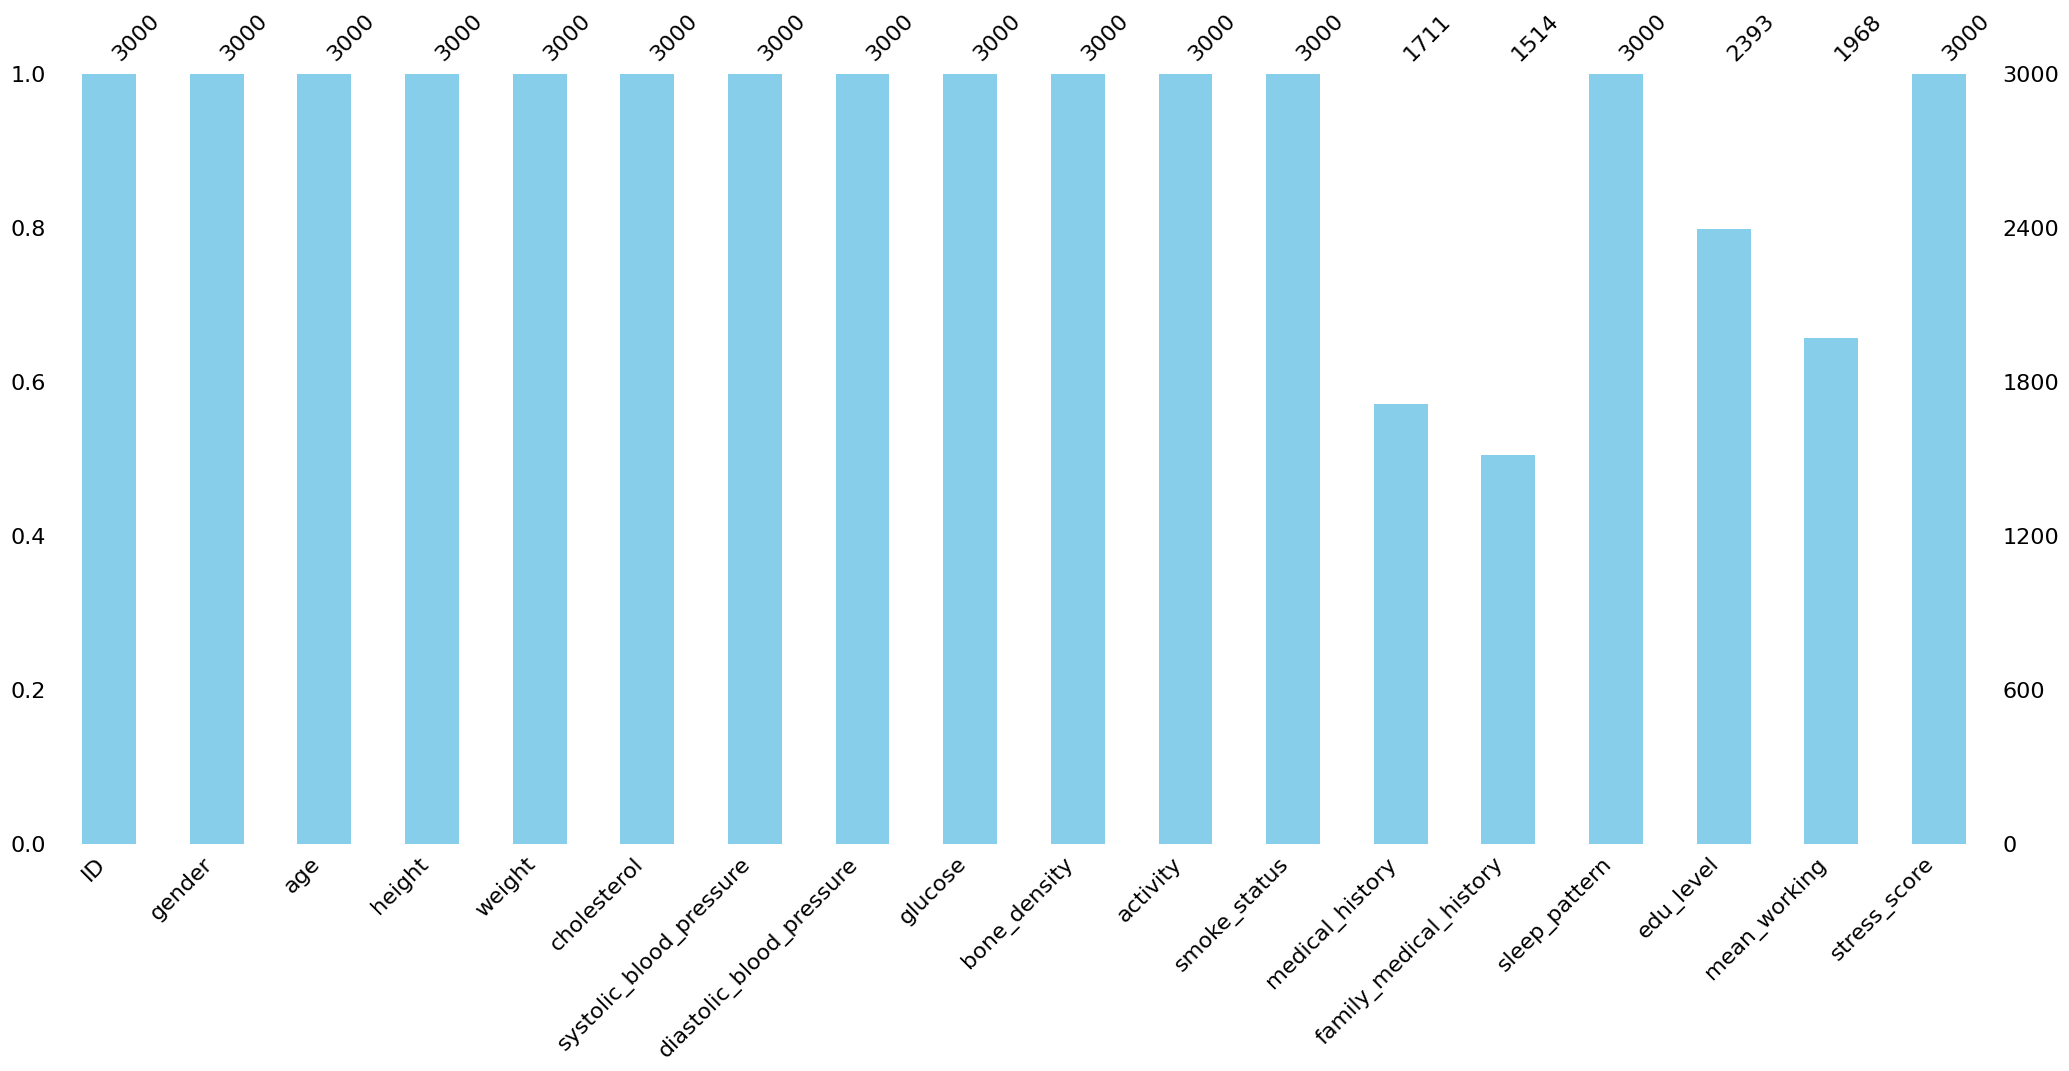

In [7]:
import missingno as msno
msno.bar(train, color='skyblue')

결측치 비율 확인

In [8]:
(train.isnull().mean() * 100).sort_values(ascending=False)

family_medical_history      49.533333
medical_history             42.966667
mean_working                34.400000
edu_level                   20.233333
gender                       0.000000
ID                           0.000000
age                          0.000000
height                       0.000000
weight                       0.000000
cholesterol                  0.000000
bone_density                 0.000000
glucose                      0.000000
diastolic_blood_pressure     0.000000
systolic_blood_pressure      0.000000
activity                     0.000000
smoke_status                 0.000000
sleep_pattern                0.000000
stress_score                 0.000000
dtype: float64

타깃 변수(stress_score) 분포 확인

Text(0.5, 1.0, 'Stress Score Distribution')

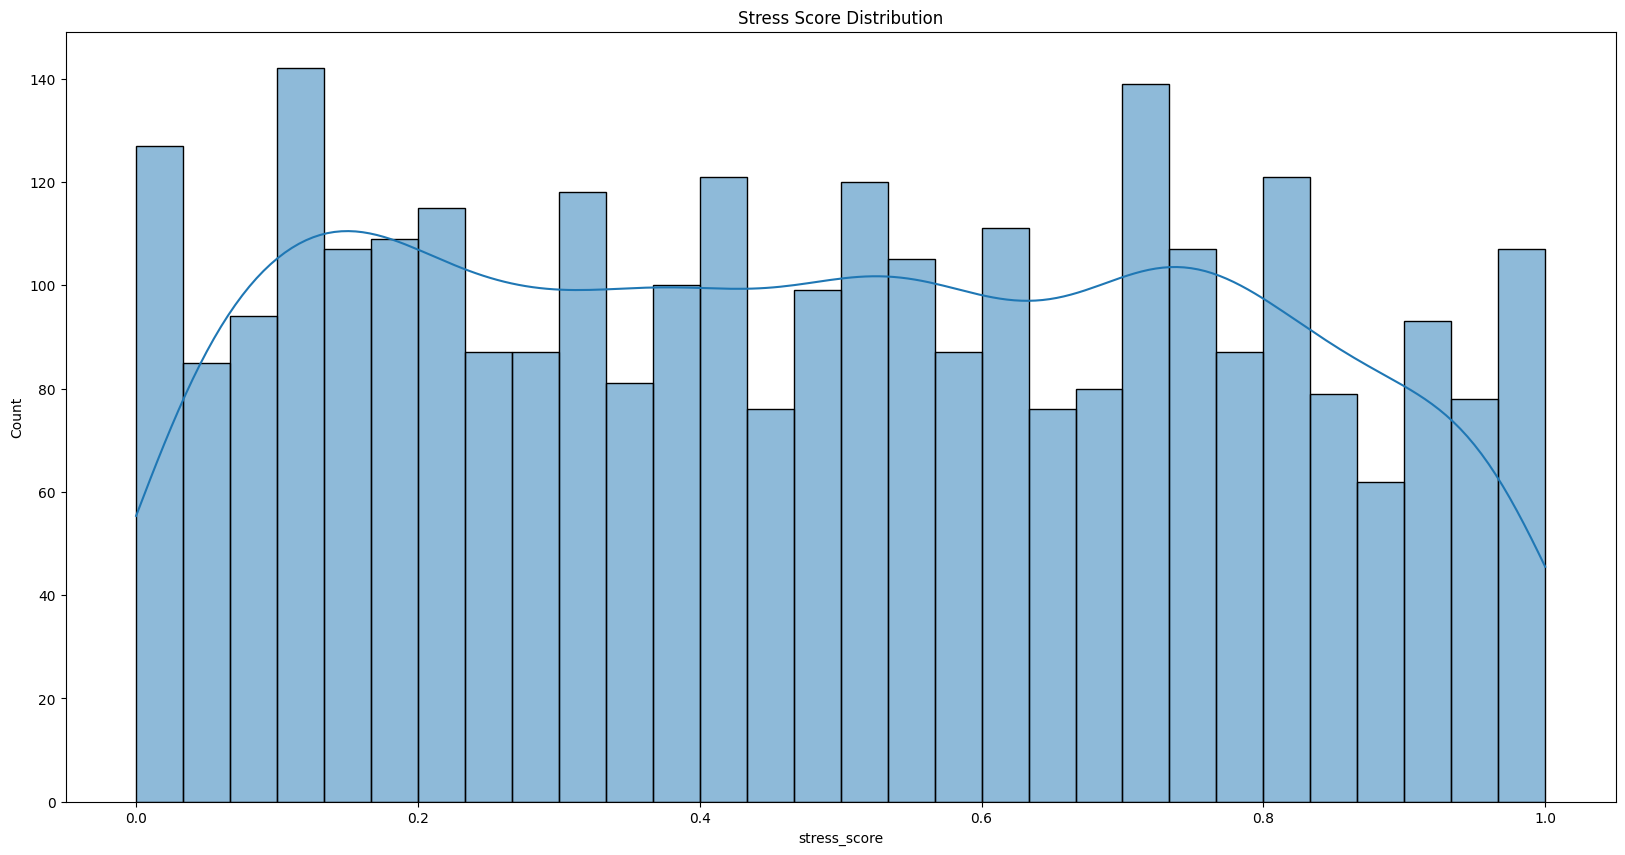

In [9]:
plt.figure(figsize=(20, 10))
sns.histplot(train['stress_score'], kde=True, bins=30)
plt.title("Stress Score Distribution")

수치형 변수와 스트레스 점수 간의 상관관계

Text(0.5, 1.0, 'Correlation Matrix with Stress Score')

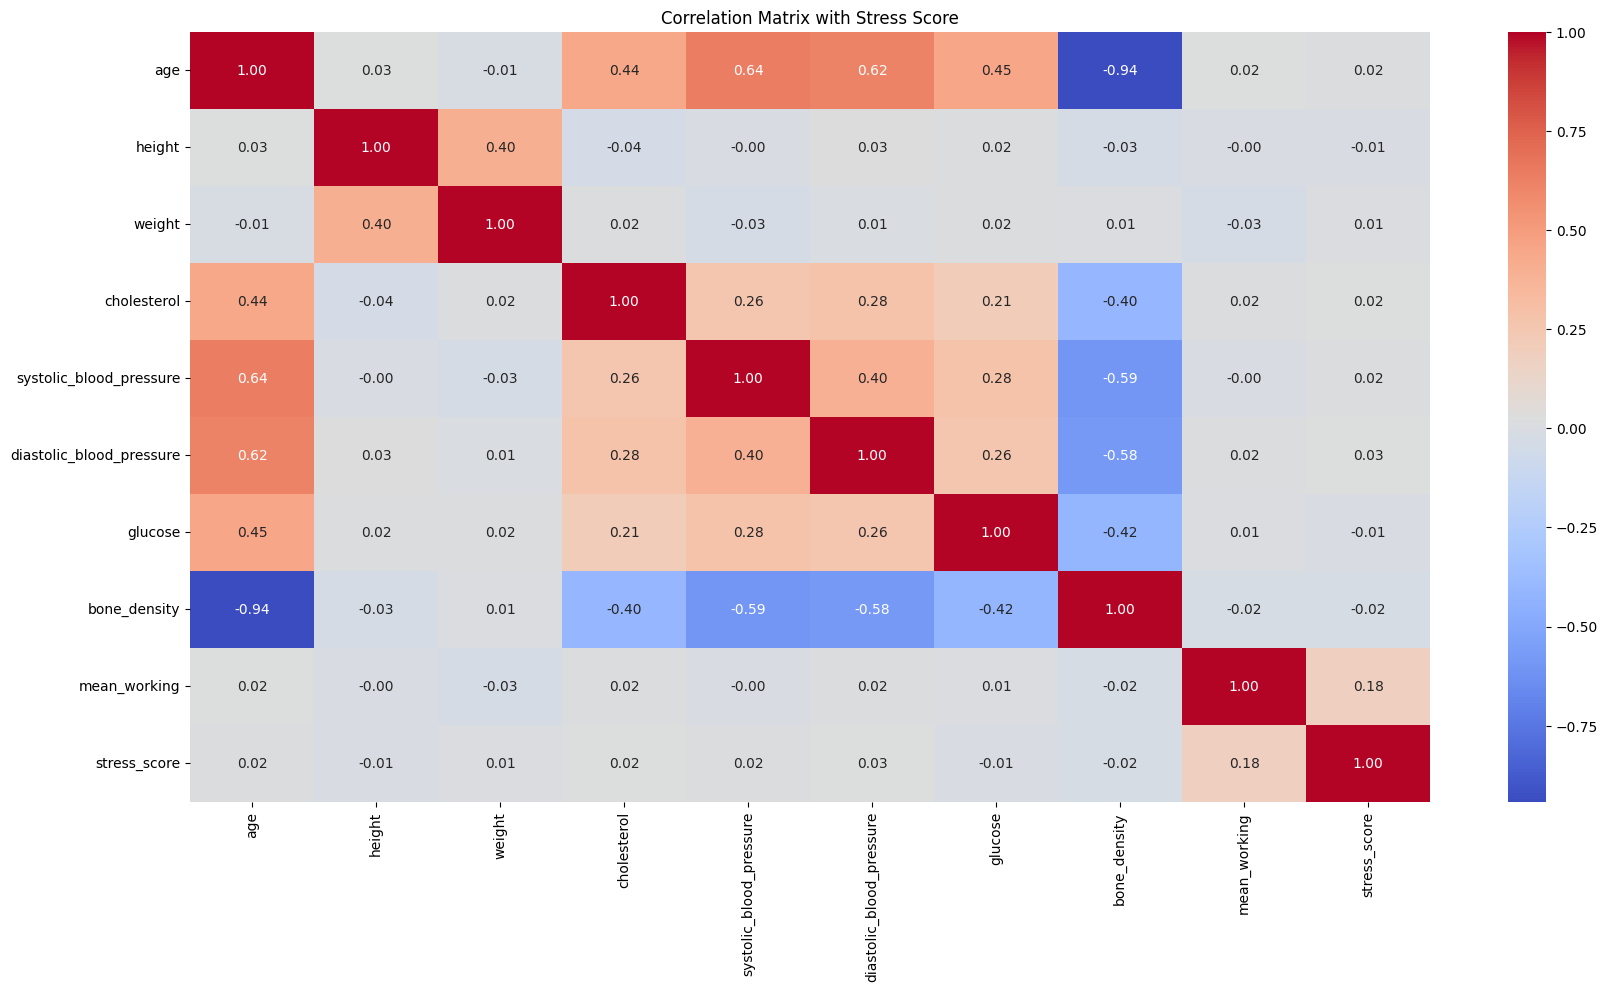

In [10]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Stress Score")

Text(0.5, 1.05, 'Stress Score by numeric')

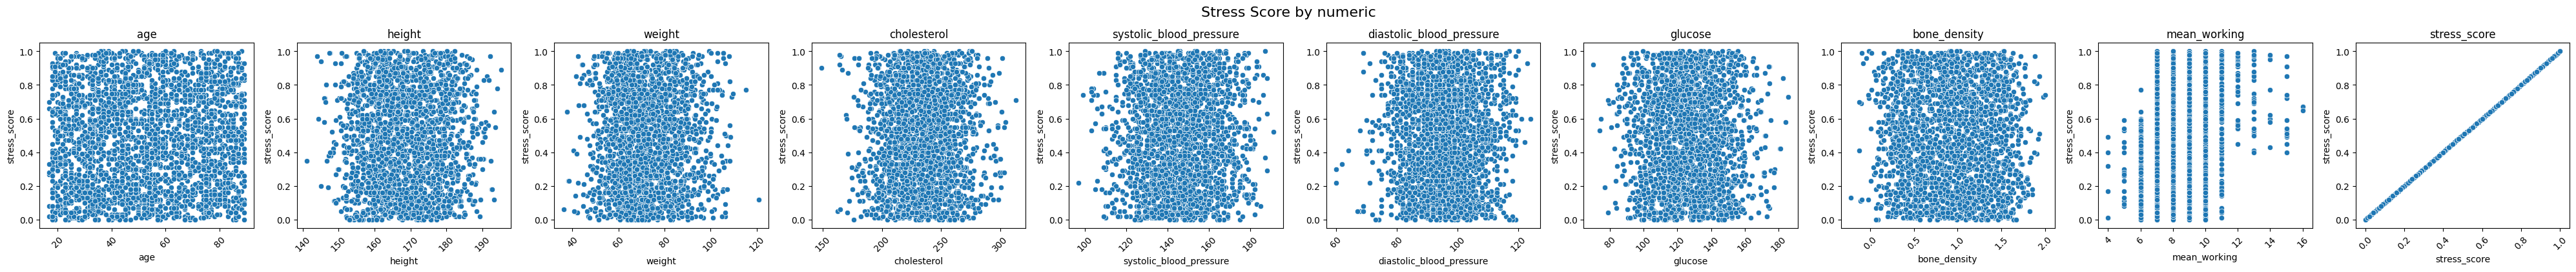

In [11]:
num_cols= [i for i in train.select_dtypes(include=['number'])]

plt.figure(figsize=(len(num_cols)*4, 4))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.scatterplot(data=train, x=col, y='stress_score')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Stress Score by numeric', fontsize=16, y=1.05)

범주형 변수와 스트레스 점수 관계

Text(0.5, 1.05, 'Stress Score by Category')

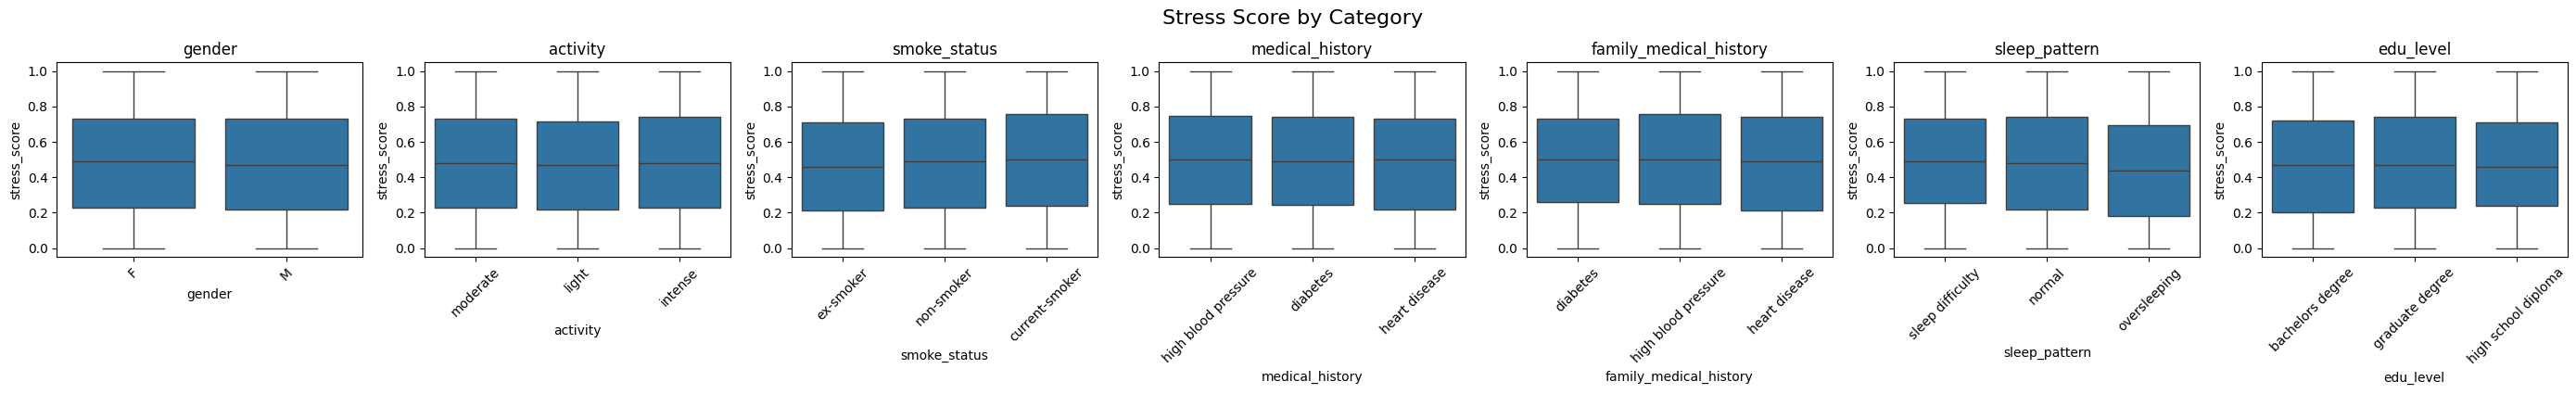

In [12]:
cat_cols = [i for i in train.select_dtypes(include=['object']) if i != 'ID']

plt.figure(figsize=(len(cat_cols)*4, 4))

for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i+1)
    sns.boxplot(data=train, x=col, y='stress_score')
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Stress Score by Category', fontsize=16, y=1.05)

In [13]:
cat_cols

['gender',
 'activity',
 'smoke_status',
 'medical_history',
 'family_medical_history',
 'sleep_pattern',
 'edu_level']

In [14]:
num_cols

['age',
 'height',
 'weight',
 'cholesterol',
 'systolic_blood_pressure',
 'diastolic_blood_pressure',
 'glucose',
 'bone_density',
 'mean_working',
 'stress_score']

In [15]:
train['diabetes'] = (train['glucose'] >= 126).astype(int)
train['hypertension'] = ((train['systolic_blood_pressure'] >= 140) | (train['diastolic_blood_pressure'] >= 90)).astype(int)
train['hyperlipidemia'] = (train['cholesterol'] >= 240).astype(int)
train['bmi'] = (train['weight'] / (train['height']*0.01)**2)
train['obesity'] = (train['bmi'] >= 30).astype(int)

Text(0.5, 1.0, 'Stress Score of Dieases')

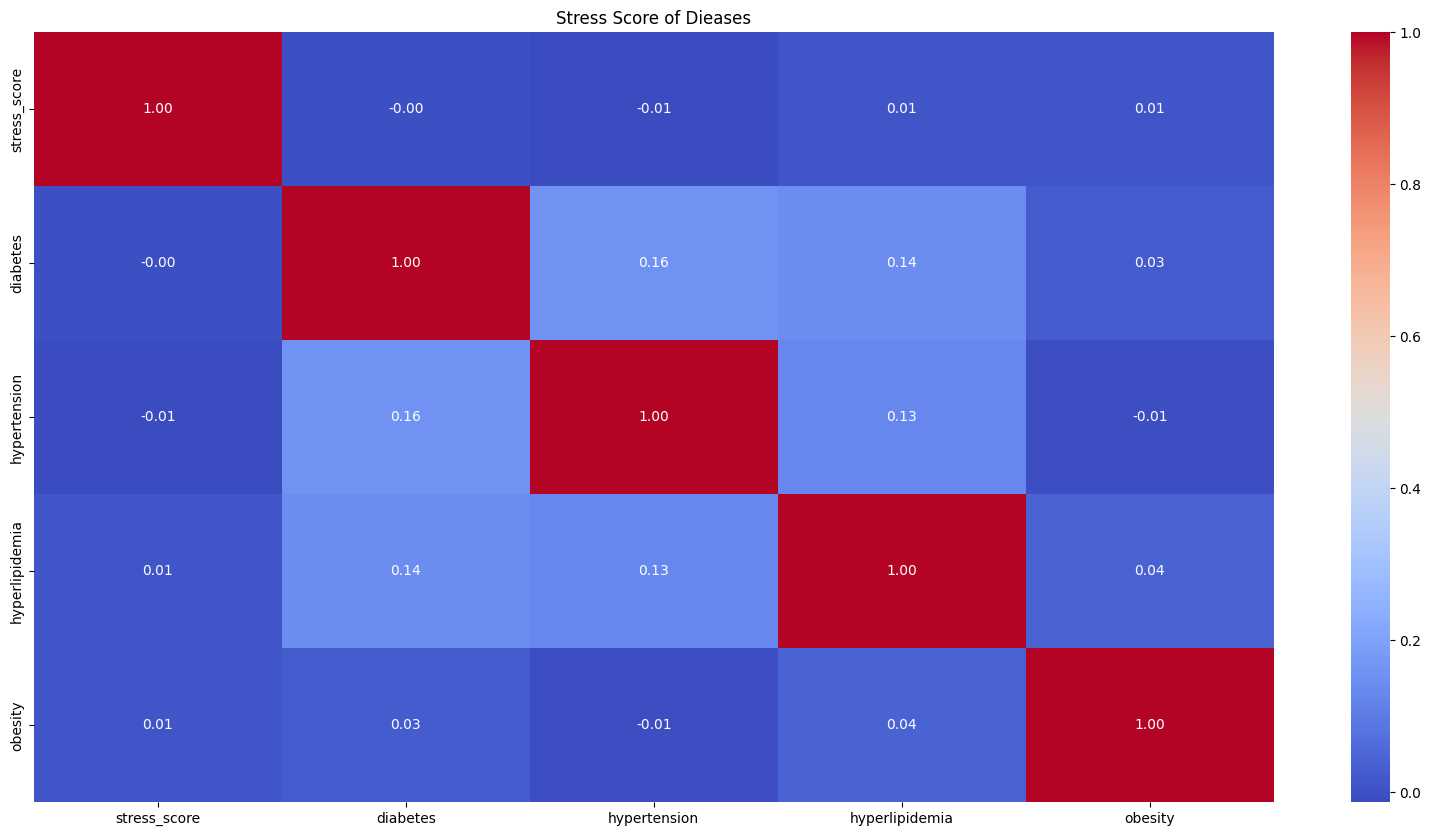

In [16]:
cols = ['stress_score', 'diabetes', 'hypertension', 'hyperlipidemia', 'obesity']
corr = train[cols].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Stress Score of Dieases")

In [17]:
import statsmodels.api as sm

X = train[['diabetes', 'hypertension', 'hyperlipidemia', 'obesity']]
y = train['stress_score']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           stress_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2584
Date:                Sun, 20 Jul 2025   Prob (F-statistic):              0.905
Time:                        20:35:40   Log-Likelihood:                -524.04
No. Observations:                3000   AIC:                             1058.
Df Residuals:                    2995   BIC:                             1088.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4891      0.015     33.

Text(0.5, 1.0, 'Stress Score vs Number of Diseases')

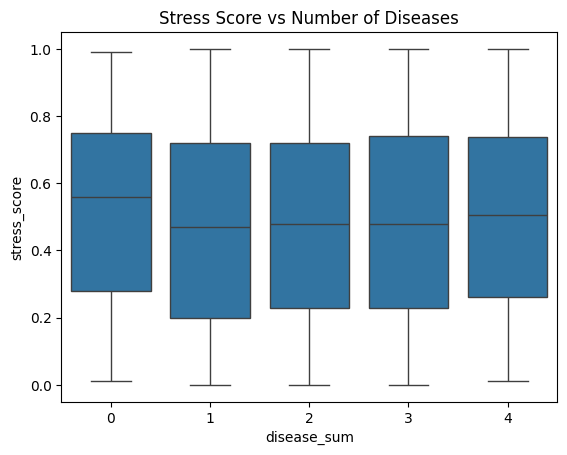

In [18]:
disease_cols = ['diabetes', 'hypertension', 'hyperlipidemia', 'obesity']
train['disease_sum'] = train[disease_cols].sum(axis=1)

plt.Figure(figsize=(8, 5))
sns.boxplot(data=train, x='disease_sum', y='stress_score')
plt.title("Stress Score vs Number of Diseases")

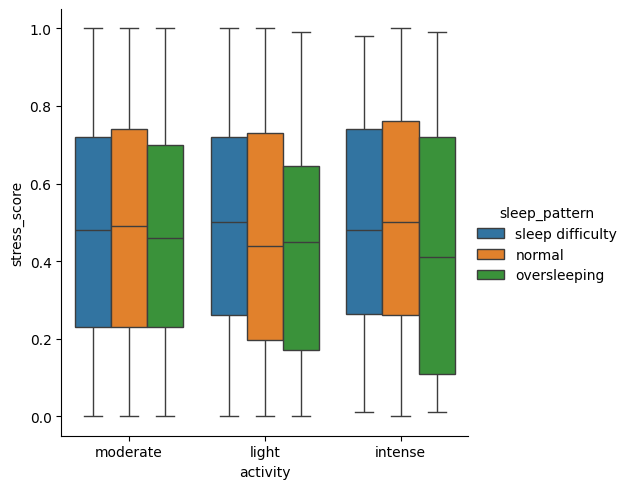

In [19]:
sns.catplot(data=train, x='activity', y='stress_score', hue='sleep_pattern', kind='box')

In [20]:
train['medical_history'] = train['medical_history'].fillna('unknown')
train['family_medical_history'] = train['family_medical_history'].fillna('unknown')
train['edu_level'] = train['edu_level'].fillna(train['edu_level'].mode()[0])

In [21]:
from sklearn.linear_model import LinearRegression

temp = train.copy()
temp_no_na = temp[temp['mean_working'].notnull()]
temp_na = temp[temp['mean_working'].isnull()]

X_cols = ['age', 'edu_level']
X_encoded = pd.get_dummies(temp_no_na[X_cols], drop_first=True)
model = LinearRegression().fit(X_encoded, temp_no_na['mean_working'])

X_missing = pd.get_dummies(temp_na[X_cols], drop_first=True).reindex(columns=X_encoded.columns, fill_value=0)
predicted = model.predict(X_missing)

train.loc[temp['mean_working'].isnull(), 'mean_working'] = predicted

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train.drop(columns=['stress_score', 'ID'])
y = train['stress_score']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 0.24468222550892413


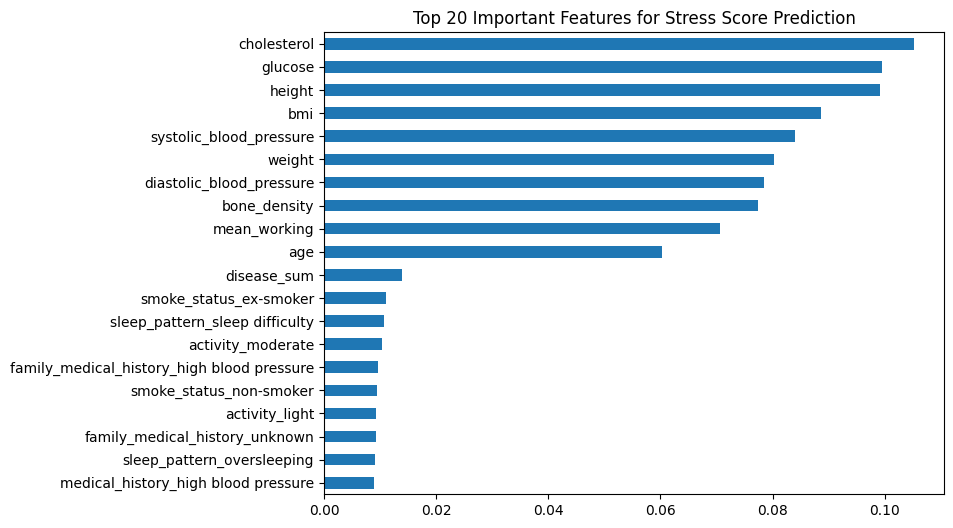

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feat_names = X.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp[:20].plot(kind='barh', figsize=(8, 6))
plt.title("Top 20 Important Features for Stress Score Prediction")
plt.gca().invert_yaxis()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


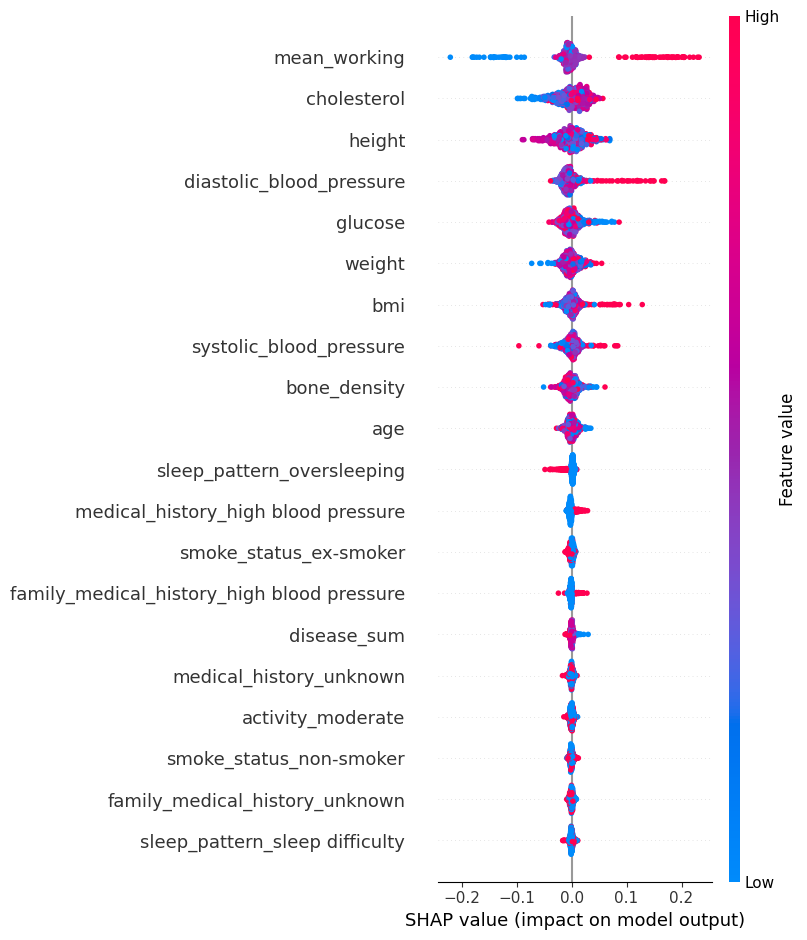

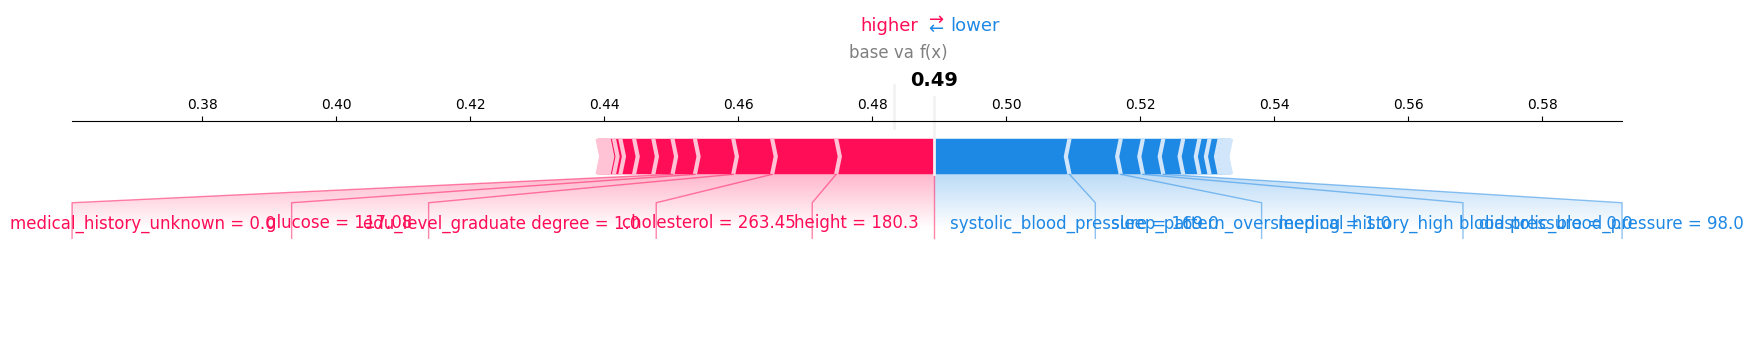

In [24]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)

In [ ]:
import lightgbm as lgb

model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

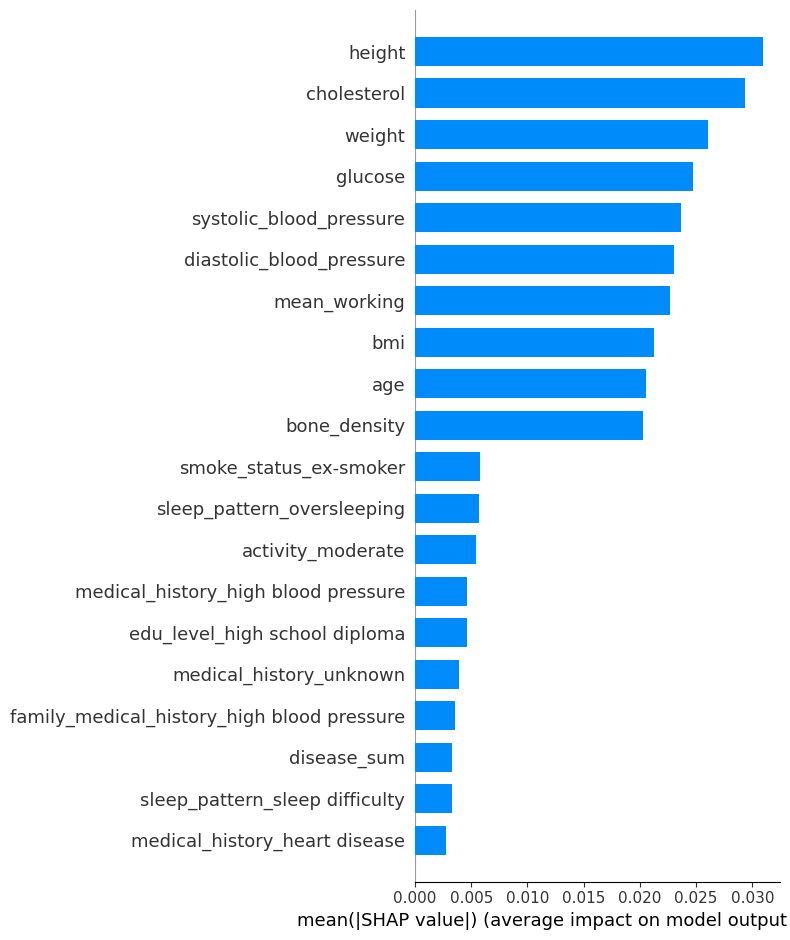

In [ ]:
from shap import TreeExplainer, summary_plot

explainer = TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

summary_plot(shap_values, X_train, plot_type="bar")

Text(0.5, 1.0, 'Feature Importance')

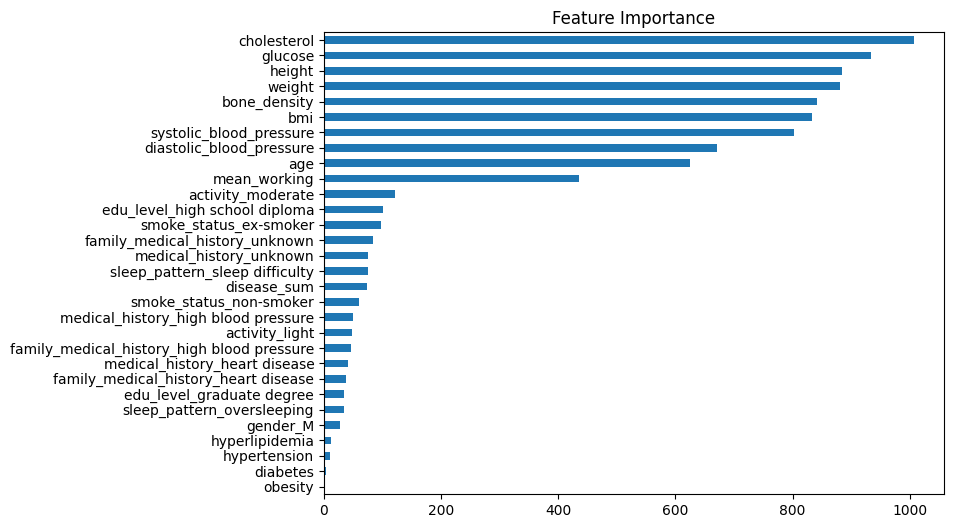

In [ ]:
importances = model.feature_importances_
feat_names = X_train.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp.plot(kind='barh', figsize=(8, 6))
plt.gca().invert_yaxis()
plt.title("Feature Importance")

Text(0.5, 1.0, 'Permutation Importance')

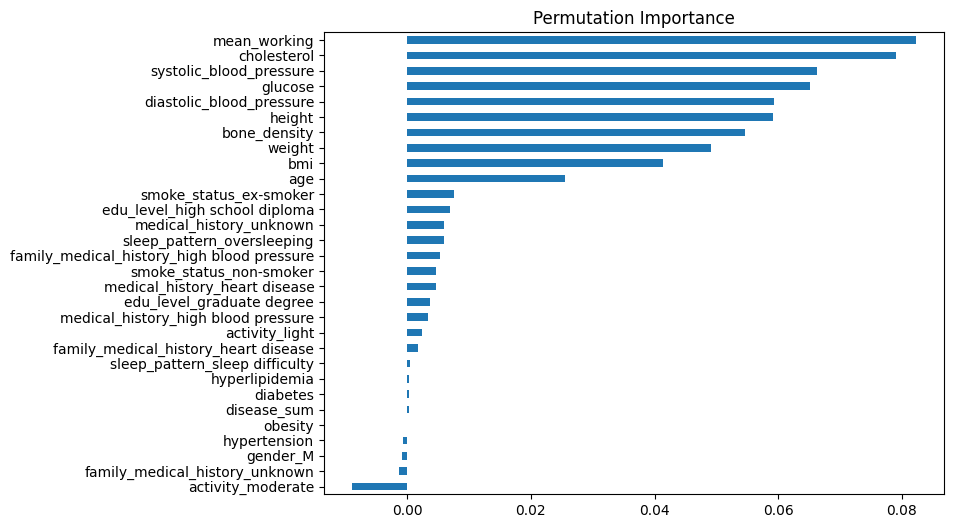

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_imp = pd.Series(result.importances_mean, index=X_test.columns)
perm_imp.sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Permutation Importance")

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
mean_abs_shap = shap_df.abs().mean().sort_values()
low_importance = mean_abs_shap[mean_abs_shap < 0.005].index.tolist()

In [ ]:
low_importance

['obesity',
 'diabetes',
 'hyperlipidemia',
 'hypertension',
 'gender_M',
 'edu_level_graduate degree',
 'activity_light',
 'family_medical_history_heart disease',
 'family_medical_history_unknown',
 'smoke_status_non-smoker',
 'medical_history_heart disease',
 'sleep_pattern_sleep difficulty',
 'disease_sum',
 'family_medical_history_high blood pressure',
 'medical_history_unknown',
 'edu_level_high school diploma',
 'medical_history_high blood pressure']

In [ ]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_rmse = np.sqrt(mean_squared_error(y_test, dummy.predict(X_test)))
print("Baseline RMSE:", dummy_rmse)

Baseline RMSE: 0.2822579813216149


In [ ]:
train['bp_diff'] = train['systolic_blood_pressure'] - train['diastolic_blood_pressure']
train['working_ratio'] = train['mean_working'] / (train['age'] + 1)
train['chol_bmi_ratio'] = train['cholesterol'] / (train['bmi'] + 1e-3)
train['glucose_bmi_ratio'] = train['glucose'] / (train['bmi'] + 1e-3)

In [ ]:
X = train.drop(columns=['stress_score', 'ID'])
y = train['stress_score']

X['bp_diff'] = train['systolic_blood_pressure'] - train['diastolic_blood_pressure']
X['working_ratio'] = train['mean_working'] / (train['age'] + 1)
X['chol_bmi_ratio'] = train['cholesterol'] / (train['bmi'] + 1e-3)

X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2634
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 34
[LightGBM] [Info] Start training from score 0.482751


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 0.2541921787750499
MAE: 0.20571591912457718
R²: 0.18891652433586337


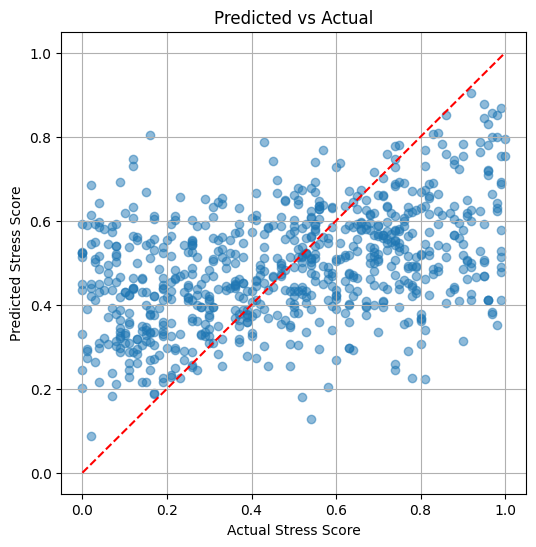

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("Actual Stress Score")
plt.ylabel("Predicted Stress Score")
plt.title("Predicted vs Actual")
plt.grid(True)

In [ ]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
dummy_rmse = np.sqrt(mean_squared_error(y_test, dummy_pred))

print("Baseline RMSE:", dummy_rmse)

Baseline RMSE: 0.2822579813216149


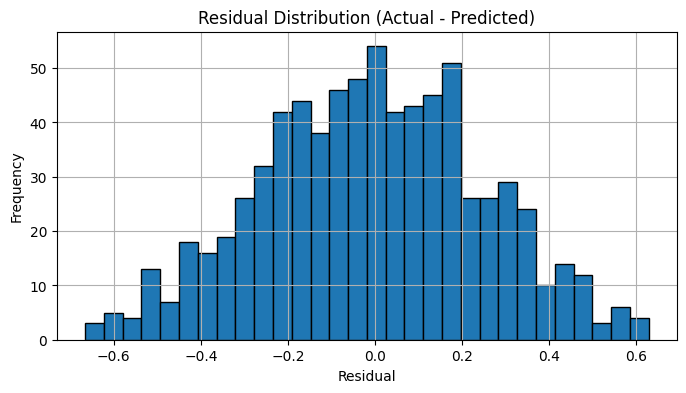

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residual Distribution (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)

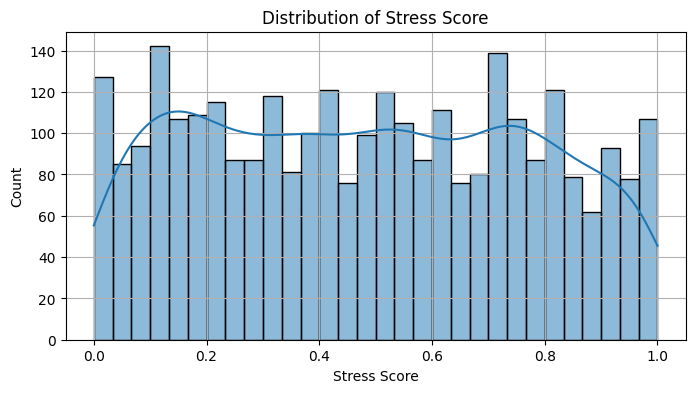

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(train['stress_score'], bins=30, kde=True)
plt.title("Distribution of Stress Score")
plt.xlabel("Stress Score")
plt.ylabel("Count")
plt.grid(True)

In [ ]:
train['stress_score']

0       0.63
1       0.83
2       0.70
3       0.17
4       0.36
        ... 
2995    0.02
2996    0.16
2997    0.16
2998    0.18
2999    0.04
Name: stress_score, Length: 3000, dtype: float64

In [ ]:
train['stress_label'] = (train['stress_score'] > 0.7).astype(int)

X = train.drop(columns=['stress_score', 'stress_label', 'ID'])
y = train['stress_label']
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 630, number of negative: 1620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2634
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280000 -> initscore=-0.944462
[LightGBM] [Info] Start training from score -0.944462
[[513  27]
 [145  65]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       540
           1       0.71      0.31      0.43       210

    accuracy                           0.77       750
   macro avg       0.74      0.63      0.64       750
weighted avg       0.76      0.77      0.74       750

ROC AUC: 0.7220458553791888


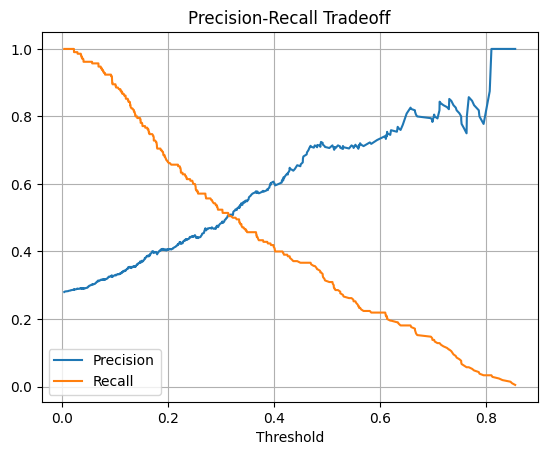

In [ ]:
from sklearn.metrics import precision_recall_curve

probs = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall Tradeoff')
plt.grid(True)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(LGBMClassifier(random_state=42), param_grid, scoring='roc_auc', cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 420, number of negative: 1080
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2604
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280000 -> initscore=-0.944462
[LightGBM] [Info] Start training from score -0.944462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [ ]:
# 최적 모델 생성
best_model = LGBMClassifier(
    learning_rate=0.1,
    max_depth=8,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)
best_model.fit(X_train, y_train)

# 예측 확률
probs = best_model.predict_proba(X_test)[:, 1]

# 임계값 조정 (예시: 0.35)
threshold = 0.35
y_pred_adjusted = (probs > threshold).astype(int)

# 평가 지표
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))
print("ROC AUC:", roc_auc_score(y_test, probs))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 630, number of negative: 1620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2634
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280000 -> initscore=-0.944462
[LightGBM] [Info] Start training from score -0.944462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [ ]:
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos = neg / pos

best_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    scale_pos_weight=scale_pos,
    random_state=42
)
best_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


[LightGBM] [Info] Number of positive: 630, number of negative: 1620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2634
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.280000 -> initscore=-0.944462
[LightGBM] [Info] Start training from score -0.944462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,8
,learning_rate,0.1
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

probs = best_model.predict_proba(X_test)[:, 1]

best_f1 = 0
best_thresh = 0
for t in np.arange(0.1, 0.9, 0.01):
    y_pred = (probs > t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best Threshold: {best_thresh:.2f}, Best F1 Score: {best_f1:.4f}")

Best Threshold: 0.43, Best F1 Score: 0.5373
